In [9]:
!pip install torchvision

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   --------------------------------- ------ 1.3/1.6 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 4.4 MB/s eta 0:00:00


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

# Cihaz kontrolü (GPU varsa kullanılır)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MNIST veri setini yükleme
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Derin sinir ağı modeli tanımı
class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Giriş katmanı
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)  # Overfitting önlemek için dropout
        self.fc2 = nn.Linear(256, 128)  # Gizli katman 1
        self.fc3 = nn.Linear(128, 64)   # Gizli katman 2
        self.fc4 = nn.Linear(64, 10)    # Çıkış katmanı

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Giriş verisini düzleştir
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

# Eğitim fonksiyonu
def train_model(dtype):
    model = DeepNN().to(device).to(dtype)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Eğitim süreci
    start_time = time.time()
    for epoch in range(10):  # 10 epoch boyunca eğitim yapalım
        model.train()
        for images, labels in train_loader:
            images = images.to(device).to(dtype)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Her epoch'ta doğruluk kontrolü
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device).to(dtype)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}, {dtype} ile doğruluk: {accuracy:.2f}%")

    elapsed_time = time.time() - start_time
    print(f"{dtype} ile toplam eğitim süresi: {elapsed_time:.2f} saniye")

    # Son doğruluk kontrolü
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device).to(dtype)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"{dtype} ile son doğruluk: {accuracy:.2f}%")

# Farklı veri türleriyle modeli eğitme ve test etme
print("float16:")
train_model(torch.float16)

print("\nfloat32:")
train_model(torch.float32)

print("\nfloat64:")
train_model(torch.float64)

float16:
Epoch 1, torch.float16 ile doğruluk: 9.80%
Epoch 2, torch.float16 ile doğruluk: 9.80%
Epoch 3, torch.float16 ile doğruluk: 9.80%
Epoch 4, torch.float16 ile doğruluk: 9.80%
Epoch 5, torch.float16 ile doğruluk: 9.80%
Epoch 6, torch.float16 ile doğruluk: 9.80%
Epoch 7, torch.float16 ile doğruluk: 9.80%
Epoch 8, torch.float16 ile doğruluk: 9.80%
Epoch 9, torch.float16 ile doğruluk: 9.80%
Epoch 10, torch.float16 ile doğruluk: 9.80%
torch.float16 ile toplam eğitim süresi: 159.84 saniye
torch.float16 ile son doğruluk: 9.80%

float32:
Epoch 1, torch.float32 ile doğruluk: 95.39%
Epoch 2, torch.float32 ile doğruluk: 97.04%
Epoch 3, torch.float32 ile doğruluk: 97.00%
Epoch 4, torch.float32 ile doğruluk: 97.09%
Epoch 5, torch.float32 ile doğruluk: 97.83%
Epoch 6, torch.float32 ile doğruluk: 97.88%
Epoch 7, torch.float32 ile doğruluk: 97.88%
Epoch 8, torch.float32 ile doğruluk: 97.87%
Epoch 9, torch.float32 ile doğruluk: 98.00%
Epoch 10, torch.float32 ile doğruluk: 98.01%
torch.float32 ile

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

# Cihaz kontrolü (GPU varsa kullanılır)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MNIST veri setini yükleme
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model tanımı
class SimpleNN(nn.Module):
    def __init__(self, activation):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.activation = activation
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Giriş verisini düzleştir
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        return x

# Aktivasyon fonksiyonları
activations = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "LeakyReLU": nn.LeakyReLU(),
    "Softmax": nn.Softmax(dim=1)  # Not: Softmax genellikle çıkış katmanında kullanılır
}

# Eğitim fonksiyonu
def train_model(activation_name):
    activation = activations[activation_name]
    model = SimpleNN(activation).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Eğitim süreci
    start_time = time.time()
    for epoch in range(5):  # 5 epoch boyunca eğitim yapalım
        model.train()
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            if activation_name == "Softmax":
                loss = criterion(outputs.log(), labels)  # Softmax ile birlikte log kullanılması gerekir
            else:
                loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    elapsed_time = time.time() - start_time
    print(f"{activation_name} ile eğitim süresi: {elapsed_time:.2f} saniye")

    # Test süreci
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"{activation_name} ile doğruluk: {accuracy:.2f}%")

# Farklı aktivasyon fonksiyonlarıyla modeli eğitme
for activation_name in activations.keys():
    print(f"\n{activation_name}:")
    train_model(activation_name)


ReLU:
ReLU ile eğitim süresi: 20.07 saniye
ReLU ile doğruluk: 97.57%

Sigmoid:
Sigmoid ile eğitim süresi: 19.90 saniye
Sigmoid ile doğruluk: 96.60%

Tanh:
Tanh ile eğitim süresi: 20.60 saniye
Tanh ile doğruluk: 97.35%

LeakyReLU:
LeakyReLU ile eğitim süresi: 20.68 saniye
LeakyReLU ile doğruluk: 97.69%

Softmax:
Softmax ile eğitim süresi: 21.13 saniye
Softmax ile doğruluk: 9.80%



ReLU:
Epoch 1, ReLU ile eğitim kaybı: 0.3416, eğitim doğruluğu: 90.39%, test doğruluğu: 94.64%
Epoch 2, ReLU ile eğitim kaybı: 0.1387, eğitim doğruluğu: 95.90%, test doğruluğu: 96.26%
Epoch 3, ReLU ile eğitim kaybı: 0.0941, eğitim doğruluğu: 97.08%, test doğruluğu: 97.08%
Epoch 4, ReLU ile eğitim kaybı: 0.0704, eğitim doğruluğu: 97.78%, test doğruluğu: 97.14%
Epoch 5, ReLU ile eğitim kaybı: 0.0558, eğitim doğruluğu: 98.23%, test doğruluğu: 97.25%
Epoch 6, ReLU ile eğitim kaybı: 0.0447, eğitim doğruluğu: 98.58%, test doğruluğu: 97.54%
Epoch 7, ReLU ile eğitim kaybı: 0.0369, eğitim doğruluğu: 98.85%, test doğruluğu: 97.78%
Epoch 8, ReLU ile eğitim kaybı: 0.0292, eğitim doğruluğu: 99.06%, test doğruluğu: 97.38%
Epoch 9, ReLU ile eğitim kaybı: 0.0226, eğitim doğruluğu: 99.29%, test doğruluğu: 97.49%
Epoch 10, ReLU ile eğitim kaybı: 0.0225, eğitim doğruluğu: 99.23%, test doğruluğu: 97.82%
ReLU ile toplam eğitim süresi: 46.47 saniye


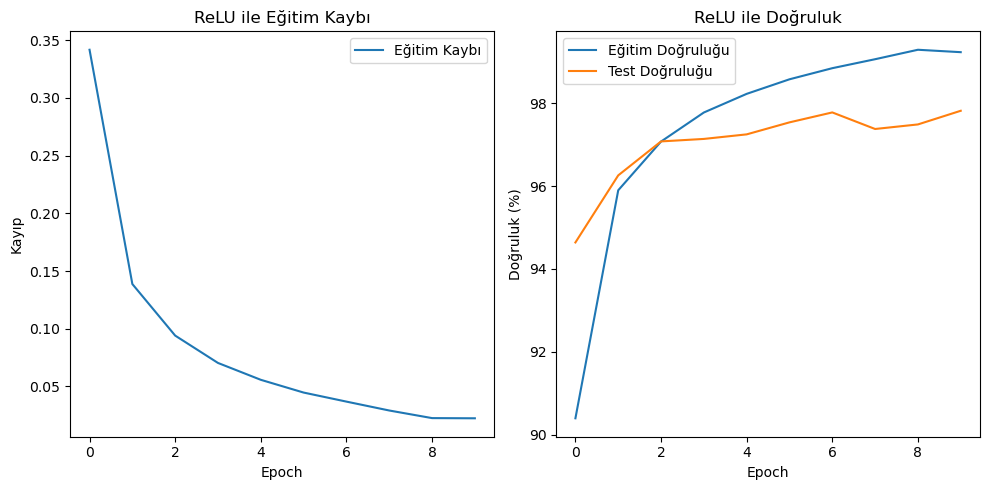


Sigmoid:
Epoch 1, Sigmoid ile eğitim kaybı: 0.7029, eğitim doğruluğu: 81.46%, test doğruluğu: 92.40%
Epoch 2, Sigmoid ile eğitim kaybı: 0.2233, eğitim doğruluğu: 93.53%, test doğruluğu: 94.36%
Epoch 3, Sigmoid ile eğitim kaybı: 0.1590, eğitim doğruluğu: 95.33%, test doğruluğu: 95.64%
Epoch 4, Sigmoid ile eğitim kaybı: 0.1226, eğitim doğruluğu: 96.45%, test doğruluğu: 96.25%
Epoch 5, Sigmoid ile eğitim kaybı: 0.0981, eğitim doğruluğu: 97.19%, test doğruluğu: 96.72%
Epoch 6, Sigmoid ile eğitim kaybı: 0.0798, eğitim doğruluğu: 97.65%, test doğruluğu: 96.84%
Epoch 7, Sigmoid ile eğitim kaybı: 0.0662, eğitim doğruluğu: 98.09%, test doğruluğu: 97.24%
Epoch 8, Sigmoid ile eğitim kaybı: 0.0554, eğitim doğruluğu: 98.44%, test doğruluğu: 97.35%
Epoch 9, Sigmoid ile eğitim kaybı: 0.0460, eğitim doğruluğu: 98.72%, test doğruluğu: 97.45%
Epoch 10, Sigmoid ile eğitim kaybı: 0.0385, eğitim doğruluğu: 98.92%, test doğruluğu: 97.59%
Sigmoid ile toplam eğitim süresi: 47.10 saniye


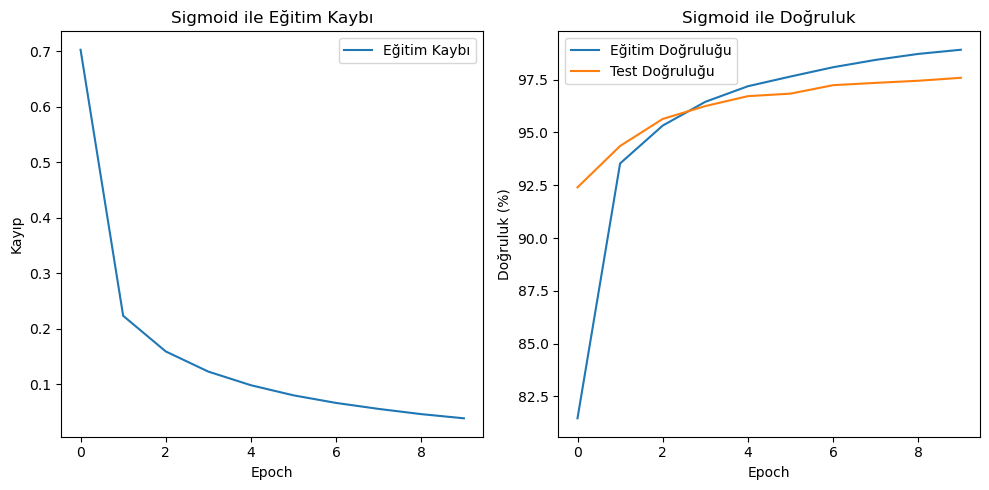


Tanh:
Epoch 1, Tanh ile eğitim kaybı: 0.3309, eğitim doğruluğu: 91.01%, test doğruluğu: 94.96%
Epoch 2, Tanh ile eğitim kaybı: 0.1352, eğitim doğruluğu: 95.95%, test doğruluğu: 96.64%
Epoch 3, Tanh ile eğitim kaybı: 0.0911, eğitim doğruluğu: 97.25%, test doğruluğu: 97.27%
Epoch 4, Tanh ile eğitim kaybı: 0.0665, eğitim doğruluğu: 97.95%, test doğruluğu: 97.34%
Epoch 5, Tanh ile eğitim kaybı: 0.0507, eğitim doğruluğu: 98.48%, test doğruluğu: 97.65%
Epoch 6, Tanh ile eğitim kaybı: 0.0387, eğitim doğruluğu: 98.79%, test doğruluğu: 97.56%
Epoch 7, Tanh ile eğitim kaybı: 0.0302, eğitim doğruluğu: 99.09%, test doğruluğu: 97.76%
Epoch 8, Tanh ile eğitim kaybı: 0.0254, eğitim doğruluğu: 99.20%, test doğruluğu: 97.71%
Epoch 9, Tanh ile eğitim kaybı: 0.0180, eğitim doğruluğu: 99.50%, test doğruluğu: 97.63%
Epoch 10, Tanh ile eğitim kaybı: 0.0159, eğitim doğruluğu: 99.52%, test doğruluğu: 97.78%
Tanh ile toplam eğitim süresi: 50.26 saniye


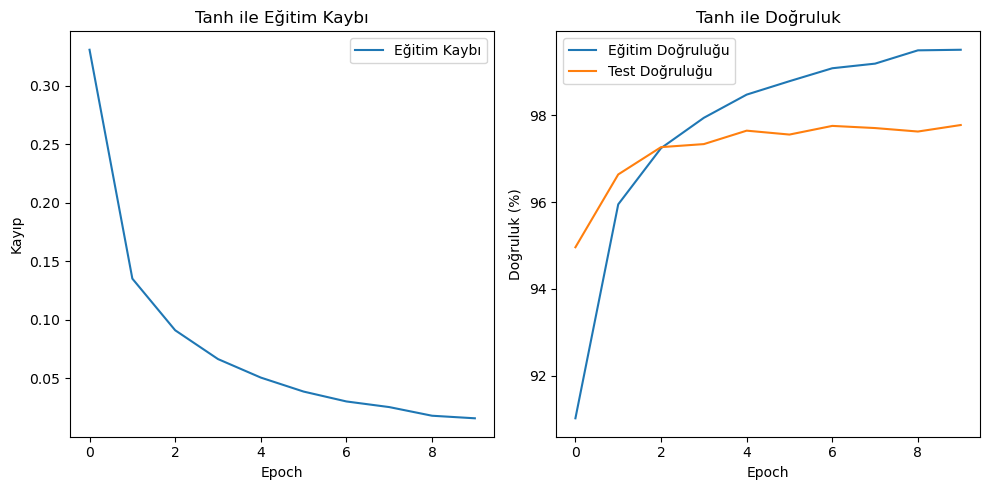


LeakyReLU:
Epoch 1, LeakyReLU ile eğitim kaybı: 0.3181, eğitim doğruluğu: 91.07%, test doğruluğu: 95.34%
Epoch 2, LeakyReLU ile eğitim kaybı: 0.1264, eğitim doğruluğu: 96.19%, test doğruluğu: 96.79%
Epoch 3, LeakyReLU ile eğitim kaybı: 0.0866, eğitim doğruluğu: 97.39%, test doğruluğu: 96.85%
Epoch 4, LeakyReLU ile eğitim kaybı: 0.0666, eğitim doğruluğu: 97.89%, test doğruluğu: 97.52%
Epoch 5, LeakyReLU ile eğitim kaybı: 0.0532, eğitim doğruluğu: 98.37%, test doğruluğu: 97.61%
Epoch 6, LeakyReLU ile eğitim kaybı: 0.0399, eğitim doğruluğu: 98.74%, test doğruluğu: 97.69%
Epoch 7, LeakyReLU ile eğitim kaybı: 0.0353, eğitim doğruluğu: 98.83%, test doğruluğu: 97.82%
Epoch 8, LeakyReLU ile eğitim kaybı: 0.0283, eğitim doğruluğu: 99.07%, test doğruluğu: 97.66%
Epoch 9, LeakyReLU ile eğitim kaybı: 0.0241, eğitim doğruluğu: 99.18%, test doğruluğu: 97.61%
Epoch 10, LeakyReLU ile eğitim kaybı: 0.0198, eğitim doğruluğu: 99.37%, test doğruluğu: 97.92%
LeakyReLU ile toplam eğitim süresi: 61.19 saniy

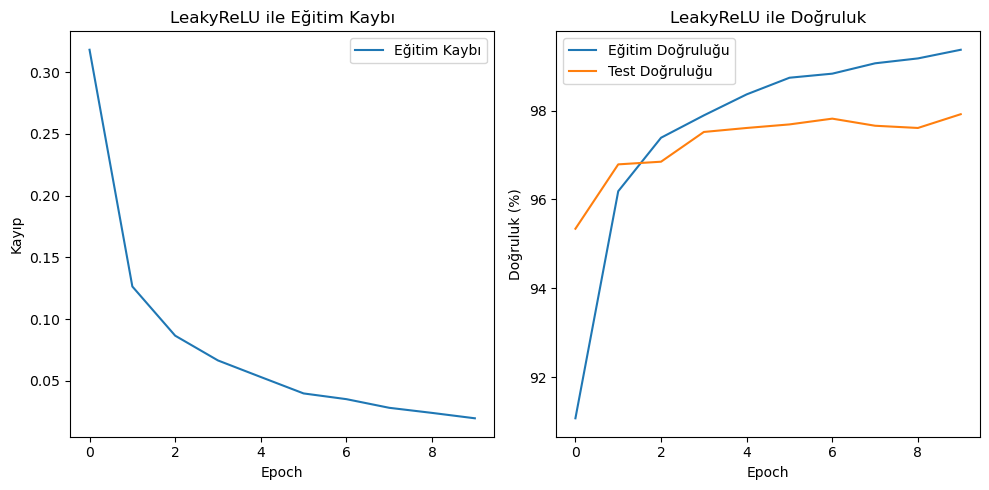


Softmax:
Epoch 1, Softmax ile eğitim kaybı: nan, eğitim doğruluğu: 9.87%, test doğruluğu: 9.80%
Epoch 2, Softmax ile eğitim kaybı: nan, eğitim doğruluğu: 9.87%, test doğruluğu: 9.80%
Epoch 3, Softmax ile eğitim kaybı: nan, eğitim doğruluğu: 9.87%, test doğruluğu: 9.80%
Epoch 4, Softmax ile eğitim kaybı: nan, eğitim doğruluğu: 9.87%, test doğruluğu: 9.80%
Epoch 5, Softmax ile eğitim kaybı: nan, eğitim doğruluğu: 9.87%, test doğruluğu: 9.80%
Epoch 6, Softmax ile eğitim kaybı: nan, eğitim doğruluğu: 9.87%, test doğruluğu: 9.80%
Epoch 7, Softmax ile eğitim kaybı: nan, eğitim doğruluğu: 9.87%, test doğruluğu: 9.80%
Epoch 8, Softmax ile eğitim kaybı: nan, eğitim doğruluğu: 9.87%, test doğruluğu: 9.80%
Epoch 9, Softmax ile eğitim kaybı: nan, eğitim doğruluğu: 9.87%, test doğruluğu: 9.80%
Epoch 10, Softmax ile eğitim kaybı: nan, eğitim doğruluğu: 9.87%, test doğruluğu: 9.80%
Softmax ile toplam eğitim süresi: 50.30 saniye


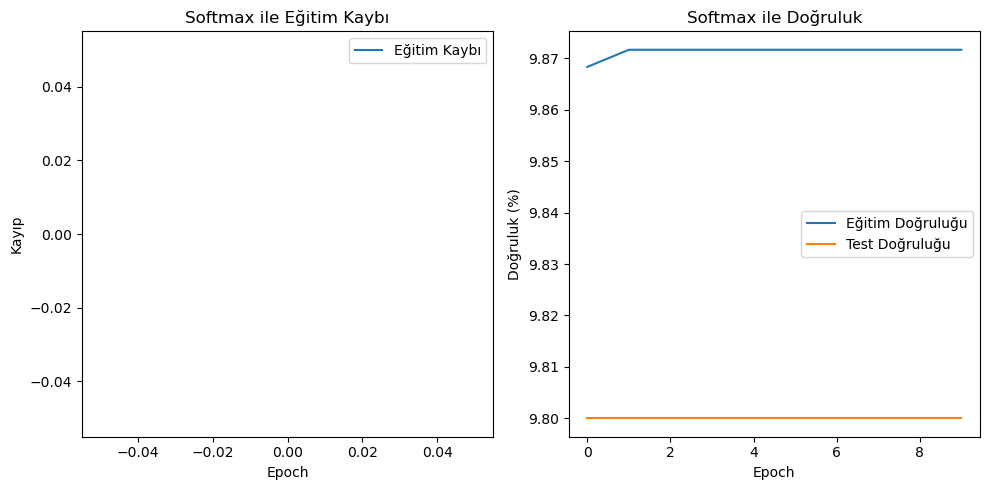

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

# Cihaz kontrolü (GPU varsa kullanılır)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Veri Yüklemesi
def load_data():
    transform = transforms.Compose([transforms.ToTensor()])
    train_dataset = datasets.MNIST(root="data", train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root="data", train=False, download=True, transform=transform)
    
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    
    return train_loader, test_loader

# Model Tanımı
class SimpleNN(nn.Module):
    def __init__(self, activation):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.activation = activation
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Giriş verisini düzleştir
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        return x

# Aktivasyon Fonksiyonları
def get_activations():
    return {
        "ReLU": nn.ReLU(),
        "Sigmoid": nn.Sigmoid(),
        "Tanh": nn.Tanh(),
        "LeakyReLU": nn.LeakyReLU(),
        "Softmax": nn.Softmax(dim=1)  # Not: Softmax genellikle çıkış katmanında kullanılır
    }

# Eğitim Fonksiyonu
def train_model(activation_name, activation, train_loader, test_loader):
    model = SimpleNN(activation).to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_accuracies = []
    train_accuracies = []

    start_time = time.time()
    for epoch in range(10):  # 10 epoch boyunca eğitim yapalım
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            if activation_name == "Softmax":
                loss = criterion(outputs.log(), labels)  # Softmax ile birlikte log kullanılması gerekir
            else:
                loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss /= len(train_loader)
        train_loss = epoch_loss
        train_accuracy = 100 * correct / total

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}, {activation_name} ile eğitim kaybı: {train_loss:.4f}, eğitim doğruluğu: {train_accuracy:.2f}%, test doğruluğu: {test_accuracy:.2f}%")

    elapsed_time = time.time() - start_time
    print(f"{activation_name} ile toplam eğitim süresi: {elapsed_time:.2f} saniye")

    # Grafiği çizme
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Eğitim Kaybı')
    plt.title(f"{activation_name} ile Eğitim Kaybı")
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Eğitim Doğruluğu')
    plt.plot(test_accuracies, label='Test Doğruluğu')
    plt.title(f"{activation_name} ile Doğruluk")
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk (%)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Ana Fonksiyon
def main():
    train_loader, test_loader = load_data()
    activations = get_activations()
    
    for activation_name, activation in activations.items():
        print(f"\n{activation_name}:")
        train_model(activation_name, activation, train_loader, test_loader)

if __name__ == "__main__":
    main()
